In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
import keras.backend as K

/home/vik/miniconda3/envs/magenta3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
input_img = Input(shape=(28,28,1)) # channels last

In [3]:
# create encoder model

x = Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

In [4]:
# at this point the representation is (4, 4, 8) i.e. 128-dimensional

In [6]:
# create decoder model

x = Conv2D(8, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation='relu')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

In [7]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [8]:
# Training

from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

In [9]:
# normalize data

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

In [11]:
x_test.shape, x_train.shape

((10000, 28, 28, 1), (60000, 28, 28, 1))

In [12]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
               epochs = 50,
               batch_size=128,
               shuffle=True,
               validation_data=(x_test,x_test),
               callbacks=[TensorBoard(log_dir='tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 61s 1ms/step - loss: 0.2063 - val_loss: 0.1670
Epoch 2/50
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1554 - val_loss: 0.1427
Epoch 3/50
60000/60000 [==============================] - 60s 1ms/step - loss: 0.1409 - val_loss: 0.1335
Epoch 4/50
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1327 - val_loss: 0.1348
Epoch 5/50
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1276 - val_loss: 0.1252
Epoch 6/50
60000/60000 [==============================] - 60s 1ms/step - loss: 0.1241 - val_loss: 0.1185
Epoch 7/50
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1212 - val_loss: 0.1192
Epoch 8/50
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1192 - val_loss: 0.1157
Epoch 9/50
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1173 - val_loss: 0.1185
Epoch

In [13]:
decoded_imgs = autoencoder.predict(x_test)

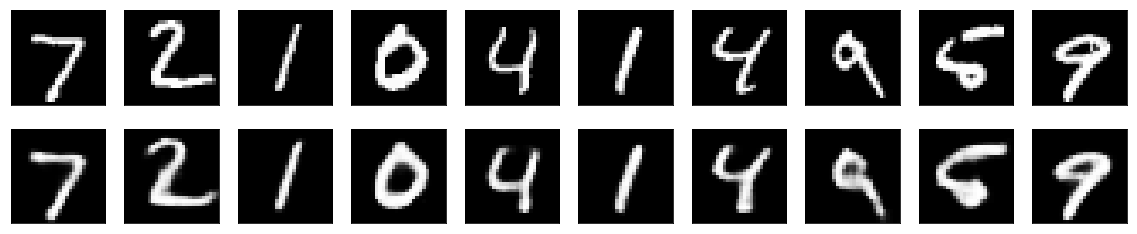

In [18]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()
    